In [38]:
import pandas as pd
import csv
papers = pd.read_csv('Book1.csv',encoding='ISO-8859-1')

In [39]:
papers

,Serial_no,Group_id,source doc_code,acquirer_name,acquirer_ISIN code,acquirer_GV key,acquirer_country,ticker_symbol_acquirer,PERMNO,date_of_press_report,target_firm_name,target_firm_country,Heading,Text
0,1,1.0,AIU1,8x8,US2829141009,65021,USA,EGHT,85177.0,5/25/2018,MarianaIQ,USA,8x8 Acquires MarianaIQ to Strengthen AI Capabi...,"8x8, Inc.(NYSE:EGHT), a leading provider of cl..."
1,2,2.0,AIE1,Accenture,IE00B4BNMY34,143357,Ireland,ACN,91814.0,1/12/2019,Knowledgent,USA,Accenture Buys US Data Intelligence Firm Knowl...,Global management consultancy Accenture has ac...
2,3,2.0,AIE2,Accenture,IE00B4BNMY34,143357,Ireland,ACN,70308.0,11/7/2018,Intrigo Systems,USA,Accenture acquires SAP partner Intrigo,"Accenture has acquired Intrigo Systems, a U.S...."
3,4,2.0,AIE3,Accenture,IE00B4BNMY34,143357,Ireland,ACN,87299.0,7/22/2015,Chaotic Moon,USA,NaN,"US-based management consulting, technology ser..."
4,5,2.0,AIE4,Accenture,IE00B4BNMY34,143357,Ireland,ACN,87299.0,7/3/2015,Brightstep,Sweden,NaN,"Accenture(NYSE:ACN) has acquired Brightstep, a..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,423,NaN,NaN,Telstra,AU000000TLS2,NaN,Australia,TLS,NaN,3/26/2015,Dr Foster,UK,NaN,MedioÃ¢â¬â¢s workforce of around 60 will sta...
419,424,NaN,NaN,MasterCard,US57636Q1040,NaN,USA,MA,91233.0,4/29/2015,APT,UK,NaN,APT founder Jim Manzi told Computing thatÃÂ p...
420,425,NaN,NaN,Apple,US0378331005,1690,USA,AAPL,14593.0,1/8/2016,Emotient,NaN,NaN,"helped firms to get ""about three per cent bett..."
421,426,NaN,NaN,Microsoft,US5949181045,12141,USA,MSFT,10107.0,9/4/2015,VoloMetrix,USA,NaN,VoloMetrix organisational analytics software a...


In [40]:
stopwords1=[]
stopwords2=[]
print(len(papers))
for i in range(len(papers)):
    acquirer_name = str(papers['acquirer_name'][i].lower()).split()
    acquirer_name=' '.join(acquirer_name)
    stopwords1.append(acquirer_name)
for i in range(len(papers)):
    target_firm_name = str(papers['target_firm_name'][i].lower()).split()
    target_firm_name=' '.join(target_firm_name)
    stopwords2.append(target_firm_name)
print(stopwords2)

# Remove the columns
papers = papers.drop(columns=['Serial_no','Group_id','source doc_code','acquirer_name','acquirer_ISIN code','acquirer_GV key','acquirer_country','ticker_symbol_acquirer','PERMNO','date_of_press_report','target_firm_name','target_firm_country','Heading'], axis=1)
# sample only 10 papers - for demonstration purposes
#papers = papers.sample(25)
# Print out the first rows of papers
papers.head(5)

423
['marianaiq', 'knowledgent', 'intrigo systems', 'chaotic moon', 'brightstep', 'changetrack research pty ltd', 'wireless co., ltd.', 'morphormics, inc.', 'adman media', 'abco gases', 'cyberfend', 'mediamath', 'onpoint medical diagnostics', 'harvard teaching hospital', 'rackspace hosting inc.,', 'ge', 'buysight, inc.', 'clara analytics', 'dynasty marketplace, inc.', 'perceptio', 'gliimpse', 'siri', 'affectiva', '3m', 'illuminate labs', 'grip entertainment technology assets', 'indix', 'mashreq bank', 'ovio technologies inc.', 'hive', 'c3.ai', 'high-tech bridge sa', 'benefit informatics, inc', 'heavywater', 'cylance', 'sparkcognition', 'sparkcognition', 'arxspan llc', 'arcsoft', 'tsmc', 'atomwise inc.', 'mindmeld', 'prime research', 'feedzai', 'hortonworks inc.', 'sualab', 'execuserve corp', 'inuvo', 'merkle inc.', 'intific inc.', 'medidata solutions, inc.', 'cyclane', 'optina diagnostics', 'decide.com', 'hunch.com', 'morgan stanley', 'sinequa', 'igodigital', 'wit.ai', 'iris.tv', 'esse

,Text
0,"8x8, Inc.(NYSE:EGHT), a leading provider of cl..."
1,Global management consultancy Accenture has ac...
2,"Accenture has acquired Intrigo Systems, a U.S...."
3,"US-based management consulting, technology ser..."
4,"Accenture(NYSE:ACN) has acquired Brightstep, a..."


In [41]:
# Load the regular expression library
import re
# Remove punctuation
papers['paper_text_processed'] = papers['Text'].map(lambda x: re.sub('[,\.!?]',' ', str(x)))
# Convert the titles to lowercase
papers['paper_text_processed'] = papers['Text'].map(lambda x: str(x).lower())
# Print out the first rows of papers
papers['paper_text_processed'].head()

0    8x8, inc.(nyse:eght), a leading provider of cl...
1    global management consultancy accenture has ac...
2    accenture has acquired intrigo systems, a u.s....
3    us-based management consulting, technology ser...
4    accenture(nyse:acn) has acquired brightstep, a...
Name: paper_text_processed, dtype: object

In [42]:
%%time
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data = papers.paper_text_processed.values.tolist()
print(data)
data_words = list(sent_to_words(data))
original_data = data_words
print(data_words[:2])

['8x8, inc.(nyse:eght), a leading provider of cloud phone, meeting, collaboration and contact center solutions,announced the acquisition of marianaiq (miq), a high-growth silicon valley startup, as part of the strategic investments it has been making in ai and machine learning. miq brings deep learning capabilities to the newly announced x series to transform both employee and customer experience. the miq team, including founders soumyadeb mitra and venkat nagaswamy, have been leaders in applying ai and deep learning to practical business problems since 2013, and join 8x8 to strengthen ai capabilities for enterprise communications."8x8 has continuously evolved itself to provide best-in-class enterprise communications to our customers.with the acquisition of marianaiq, we are fundamentally transforming how customers and employees interact through one system of engagement, and how companies optimize valuable moments of customer engagement with one set of data in one system of intelligenc

[['inc', 'nyse', 'eght', 'leading', 'provider', 'of', 'cloud', 'phone', 'meeting', 'collaboration', 'and', 'contact', 'center', 'solutions', 'announced', 'the', 'acquisition', 'of', 'marianaiq', 'miq', 'high', 'growth', 'silicon', 'valley', 'startup', 'as', 'part', 'of', 'the', 'strategic', 'investments', 'it', 'has', 'been', 'making', 'in', 'ai', 'and', 'machine', 'learning', 'miq', 'brings', 'deep', 'learning', 'capabilities', 'to', 'the', 'newly', 'announced', 'series', 'to', 'transform', 'both', 'employee', 'and', 'customer', 'experience', 'the', 'miq', 'team', 'including', 'founders', 'soumyadeb', 'mitra', 'and', 'venkat', 'nagaswamy', 'have', 'been', 'leaders', 'in', 'applying', 'ai', 'and', 'deep', 'learning', 'to', 'practical', 'business', 'problems', 'since', 'and', 'join', 'to', 'strengthen', 'ai', 'capabilities', 'for', 'enterprise', 'communications', 'has', 'continuously', 'evolved', 'itself', 'to', 'provide', 'best', 'in', 'class', 'enterprise', 'communications', 'to', 'ou

In [43]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=1, threshold=1) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=1)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [64]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stopwords4=['customer','service','platform','datum','capability','client']
#stop_words.extend(['from', 'subject', 're', 'edu','to','company','say','today','announce','also','edi','well','include','help','said','technology','disclose','would','avalara','indix','amazon','appfolio','dynasty','black knight','blackknight','knight','heavywater','cylance','blackberry','cognex','sualab','sailpoint','salesforce','redwood','city','sonasoft','optimaize','8x8','marianaiq','apple','siri','cisco','mindmeld','conversionpoint','inuvo','inc.','fronteo','edi','hewlett','packard','mapr','ibm','ibm1','ibm2','alchemyapi','alchemy','nvidia','mellanox','recall','studios','us','evolution','rocket','fuel','plus','x','s&p','kensho','sealed','intellibot','grapevine','seven','stars','sysorex','lightminer','veritone','box','zd','ventures','bluesence','acquisition','berkshire','base','take','know','want','deal','go','new','even','make','found','many','aquire','founder','nearly','ten','use','enable','global'])
stop_words.extend(stopwords1)
stop_words.extend(stopwords2)
stop_words.extend(stopwords4)
stop_words.extend(['bluesence','iridescent','snapchat','veritone','ubera','avast','mediamath','sophos','also','company','solution','technology','say','acquisition','include','acquire','well','ax','shiseido','servicenow','israeli','japanese','make','baidu','avaya','aiware','oss','avaya','announce','use','team','provide','help','new','bring','add','salesforce','may','gpus','legal','dsp','ceos','altera','azure','get','set','go','aquire','salesforce','aprimo','lti','vemm','bangalore','still','could','want','blackbird','seem','blackbirda','shall','nanle','around','ar','hololen','cornerstone','wdatp','ca','cgi','abco','asda','buy','deal','deephi','degx','avitassystem','inputte','volta','ad','much','take','hope','instead','see','usd','tupac','imascap','vtec','furuse','tell','base','focus','continue'])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [66]:
import spacy

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatizing = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
data_lemmatized = remove_stopwords(data_lemmatizing)
print(data_lemmatized)

[['phone', 'meeting', 'collaboration', 'startup', 'part', 'strategic', 'investment', 'learn', 'newly', 'series', 'transform', 'employee', 'experience', 'soumyadeb', 'nagaswamy', 'leader', 'deep_learne', 'practical', 'continuously', 'evolve', 'good', 'class', 'fundamentally', 'transform', 'interact', 'engagement', 'optimize', 'valuable', 'moment', 'intelligence', 'deklich', 'officer', 'thrill', 'ai', 'talent', 'strengthen', 'enterprise', 'engagement', 'experience', 'cio', 'battlefield', 'accord', 'survey', 'nearly', 'cio', 'plan', 'deploy', 'improve', 'experience', 'learning', 'cio', 'win', 'experience', 'battle', 'context', 'rich', 'engagement', 'ai', 'enhance', 'system', 'intelligence', 'weave', 'contextual', 'personalization', 'infuse', 'capabilitie', 'series', 'agent', 'detail', 'information', 'complete', 'history', 'degree', 'context', 'even', 'start', 'conversation', 'route', 'route', 'experience', 'transformation', 'intelligent', 'route', 'expert', 'significantly', 'speed', 'firs

In [67]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus)

[[(0, 1), (1, 3), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 3), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 2), (29, 4), (30, 2), (31, 2), (32, 1), (33, 1), (34, 1), (35, 8), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 3), (49, 1), (50, 1), (51, 1), (52, 1), (53, 2), (54, 1), (55, 1), (56, 1), (57, 2), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 3), (85, 1), (86, 2), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 3), (103, 1), (104, 1), (105, 3), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1)

In [68]:
# supporting function
from gensim.models import CoherenceModel

def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [21]:

import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 16
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.75), 
               corpus]

corpus_title = ['100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results_Bigrams.csv', index=False)
    pbar.close()


  0%|                                                                                          | 0/420 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [74]:
num_of_docs = len(corpus)
sets=gensim.utils.ClippedCorpus(corpus,int(.25*num_of_docs))
lda_model = gensim.models.LdaMulticore(corpus=sets,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.91,
                                           eta=0.91)
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.397890828060342


In [75]:
from pprint import pprint

# Print the Keyword in all topics
pprint(lda_model.print_topics(num_words=40))
doc_lda = lda_model[corpus]  

[(0,
  '0.001*"lead" + 0.001*"end" + 0.001*"atomwise" + 0.001*"execuserve" + '
  '0.001*"patient" + 0.001*"compound" + 0.001*"royalty" + 0.001*"hire" + '
  '0.001*"diabetes" + 0.001*"today" + 0.001*"inspection" + 0.001*"application" '
  '+ 0.001*"support" + 0.001*"project" + 0.001*"partner" + 0.001*"goal" + '
  '0.001*"drug" + 0.001*"pipeline" + 0.001*"container" + 0.001*"corporation" + '
  '0.001*"hit" + 0.001*"product" + 0.001*"visual" + 0.001*"target" + '
  '0.000*"billion" + 0.000*"trust" + 0.000*"development" + 0.000*"call_center" '
  '+ 0.000*"anticipate" + 0.000*"reach" + 0.000*"commercial" + 0.000*"create" '
  '+ 0.000*"success" + 0.000*"treatment" + 0.000*"secure" + 0.000*"term" + '
  '0.000*"people" + 0.000*"enterprise" + 0.000*"accelerate" + '
  '0.000*"historically"'),
 (1,
  '0.001*"design" + 0.001*"support" + 0.001*"robot" + 0.001*"custom" + '
  '0.001*"methodology" + 0.001*"program" + 0.001*"certify" + 0.001*"tool" + '
  '0.001*"woman" + 0.001*"predictive" + 0.001*"turn"

In [76]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis 
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.055258 -0.014789       1        1  58.897411
4     -0.028338  0.027909       2        1  23.558981
8      0.001902 -0.010326       3        1   4.177839
5      0.007300 -0.003032       4        1   2.998608
1      0.012167  0.000059       5        1   2.104524
9      0.010732 -0.000342       6        1   1.902279
6      0.009998 -0.000350       7        1   1.826303
0      0.009020 -0.001001       8        1   1.814952
3      0.015612  0.000527       9        1   1.514347
7      0.016865  0.001344      10        1   1.204755, topic_info=            Term       Freq      Total Category  logprob  loglift
416      patient  36.000000  36.000000  Default  30.0000  30.0000
1830       cloud  59.000000  59.000000  Default  29.0000  29.0000
738       vision  21.000000  21.000000  Default  28.0000  28.0000
35    experience  80.000000  80.000000  Default  27.0000  27.0000
701     industry  61.000000  61.000000  Default  26.0000  26.0000
...          ...        ...        ...      ...      ...      ...
1254        role   0.122739   7.566886  Topic10  -8.4085   0.2974
1268  autonomous   0.122055   7.511468  Topic10  -8.4141   0.2992
823   commercial   0.154850  18.941595  Topic10  -8.1761  -0.3878
1095    mobility   0.128891  11.336581  Topic10  -8.3596  -0.0579
229       launch   0.142656  25.266788  Topic10  -8.2582  -0.7579

[562 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1542      1  0.557135  accessible
1542      2  0.185712  accessible
0         1  0.881393      accord
0         2  0.066104      accord
0         5  0.022035      accord
...     ...       ...         ...
2605      2  0.217544     writing
260       1  0.817630        year
260       2  0.136272        year
260       3  0.017034        year
260       4  0.017034        year

[1159 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 9, 6, 2, 10, 7, 1, 4, 8])

In [16]:
pyLDAvis.save_html(LDAvis_prepared, 'lda.html')

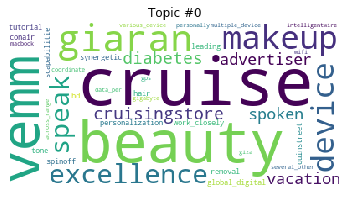

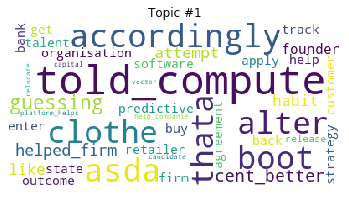

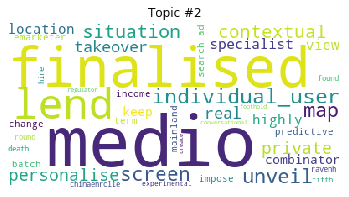

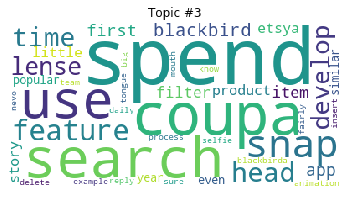

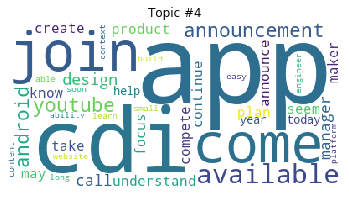

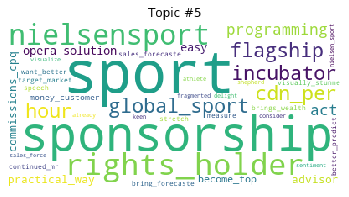

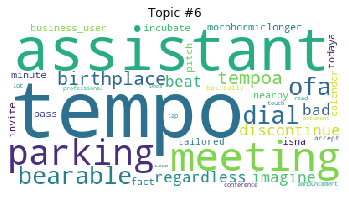

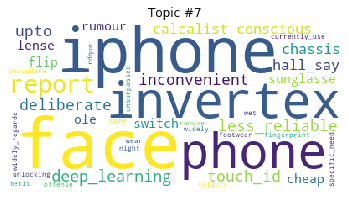

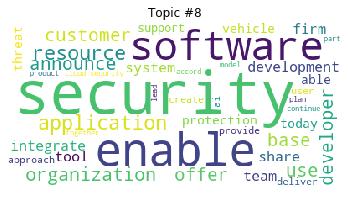

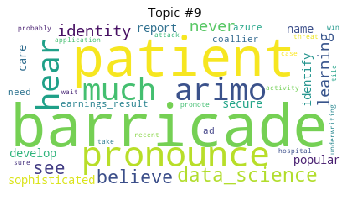

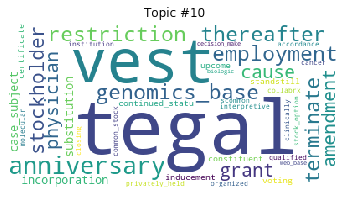

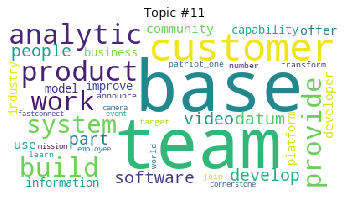

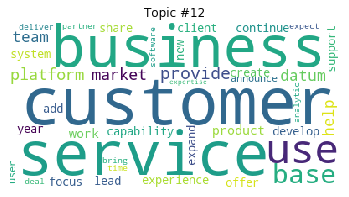

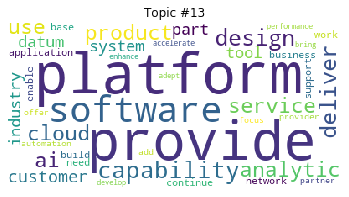

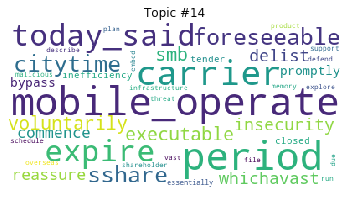

In [17]:
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud
for t in range(lda_model.num_topics):
    plt.figure()
    #plt.imshow(WordCloud().fit_words(lda_model.show_topic(t, 200)))
    plt.imshow(WordCloud(background_color='white').fit_words(dict(lda_model.show_topic(t, 40))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.savefig("Topic#"+str(t), format='pdf')
    plt.show()

In [73]:
Topic_0 = []
Topic_1 = []
Topic_2 = []
Topic_3 = []
Topic_4 = []
Topic_5 = []
Topic_6 = []
Topic_7 = []
Topic_8 = []
Topic_9 = []
Topic_10 = []
Topic_11 = []
Topic_12 = []
Topic_13 = []
Topic_14 = []
Doc_No = []
data_lemmatized_word = []
for i, row in enumerate(lda_model[corpus]):
    #row = sorted(row, key=lambda x:x[1], reverse=True)
    Topic_0.append(0);
    Topic_1.append(0);
    Topic_2.append(0);
    Topic_3.append(0);
    Topic_4.append(0);
    Topic_5.append(0);
    Topic_6.append(0);
    Topic_7.append(0);
    Topic_8.append(0);
    Topic_9.append(0);
    Topic_10.append(0);
    Topic_11.append(0);
    Topic_12.append(0);
    Topic_13.append(0);
    Topic_14.append(0);
    Doc_No.append(i);
    data_lemmatized_word.append(data_lemmatized[i])
    for k in range(len(row)):
        if(row[k][0]==0):
            Topic_0[i]=row[k][1];
        if(row[k][0]==1):
            Topic_1[i]=row[k][1];
        if(row[k][0]==2):
            Topic_2[i]=row[k][1];
        if(row[k][0]==3):
            Topic_3[i]=row[k][1];
        if(row[k][0]==4):
            Topic_4[i]=row[k][1];
        if(row[k][0]==5):
            Topic_5[i]=row[k][1];
        if(row[k][0]==6):
            Topic_6[i]=row[k][1];
        if(row[k][0]==7):
            Topic_7[i]=row[k][1];
        if(row[k][0]==8):
            Topic_8[i]=row[k][1];
        if(row[k][0]==9):
            Topic_9[i]=row[k][1];
        if(row[k][0]==10):
            Topic_10[i]=row[k][1];
        if(row[k][0]==11):
            Topic_11[i]=row[k][1];
        if(row[k][0]==12):
            Topic_12[i]=row[k][1];
        if(row[k][0]==13):
            Topic_13[i]=row[k][1];
        if(row[k][0]==14):
            Topic_14[i]=row[k][1];

df = pd.DataFrame(list(zip(Doc_No, Topic_0, Topic_1, Topic_2, Topic_3, Topic_4, Topic_5, Topic_6, Topic_7, Topic_8, Topic_9, Topic_10, Topic_11, Topic_12, Topic_13, Topic_14,data_lemmatized_word)), 
               columns = ['Doc_No', 'Topic#0', 'Topic#1', 'Topic#2', 'Topic#3', 'Topic#4', 'Topic#5', 'Topic#6', 'Topic#7', 'Topic#8', 'Topic#9', 'Topic#10', 'Topic#11', 'Topic#12', 'Topic#13', 'Topic#14','Text'])
df.to_csv('Topic_Score_for_each_Document.csv')